In [1]:
cd drive/MyDrive/CAMemBERT-Adapters/

/content/drive/MyDrive/CAMemBERT-Adapters


In [2]:
!pip install -U git+https://github.com/Adapter-Hub/adapter-transformers.git
!pip install datasets

  Cloning https://github.com/Adapter-Hub/adapter-transformers.git to /tmp/pip-req-build-d4km7h0c
  Running command git clone -q https://github.com/Adapter-Hub/adapter-transformers.git /tmp/pip-req-build-d4km7h0c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for adapter-transformers: filename=adapter_transformers-2.0.1-cp37-none-any.whl size=2099116 sha256=c6213ef6b6b27e52867dfbed97ed412a07ee39b21668522e12466cd24d2924de
  Stored in directory: /tmp/pip-ephem-wheel-cache-hcyfj3z2/wheels/b0/56/c9/5bf1c51cd513412090ad751ab10fc025210176bf0a82dd8af3
Successfully built adapter-transformers
  Found existing installation: adapter-transformers 2.0.1
    Uninstalling adapter-transformers-2.0.1:
      Successfully uninstalled adapter-transformers-2.0.1


Using custom data configuration default-0f21cdc4483ace83
Reusing dataset csv (/root/.cache/huggingface/datasets/csv/default-0f21cdc4483ace83/0.0.0/2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0)
Loading cached processed dataset at /root/.cache/huggingface/datasets/csv/default-0f21cdc4483ace83/0.0.0/2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0/cache-74602d06527ca8de.arrow


Loading cached processed dataset at /root/.cache/huggingface/datasets/csv/default-0f21cdc4483ace83/0.0.0/2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0/cache-4203c12e48fdb1a1.arrow


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch,Training Loss,Validation Loss,Loss,F1,Accuracy
1,0.479000,0.381106,0.218201,0.895484,0.846300
2,0.260000,0.401230,0.099409,0.904393,0.859583
3,0.155000,0.718878,0.063152,0.886571,0.834915
4,0.087600,0.796310,0.032513,0.892626,0.842505


{'train_loss': 0.21820060908794403, 'train_f1': 0.9468790357296599, 'train_accuracy': 0.9231056829511466, 'eval_loss': 0.38110587000846863, 'eval_f1': 0.895483870967742, 'eval_accuracy': 0.8462998102466793}
{'train_loss': 0.09940852969884872, 'train_f1': 0.9787159190853123, 'train_accuracy': 0.9698404785643071, 'eval_loss': 0.4012303948402405, 'eval_f1': 0.9043927648578811, 'eval_accuracy': 0.8595825426944972}
{'train_loss': 0.06315240263938904, 'train_f1': 0.9874646892655368, 'train_accuracy': 0.9823030907278165, 'eval_loss': 0.7188777327537537, 'eval_f1': 0.8865710560625815, 'eval_accuracy': 0.8349146110056926}
{'train_loss': 0.03251255303621292, 'train_f1': 0.9934790271413464, 'train_accuracy': 0.9907776669990029, 'eval_loss': 0.7963096499443054, 'eval_f1': 0.8926261319534283, 'eval_accuracy': 0.8425047438330171}

__________test set results__________


{'eval_loss': 0.44170233607292175, 'eval_f1': 0.8826666666666667, 'eval_accuracy': 0.8330170777988615}
_________plotting history__________
defaultdict(<class 'list'>, {('_loss', 'train'): [0.21820060908794403, 0.09940852969884872, 0.06315240263938904, 0.03251255303621292], ('_f1', 'train'): [0.9468790357296599, 0.9787159190853123, 0.9874646892655368, 0.9934790271413464], ('_accuracy', 'train'): [0.9231056829511466, 0.9698404785643071, 0.9823030907278165, 0.9907776669990029], ('_loss', 'eval'): [0.38110587000846863, 0.4012303948402405, 0.7188777327537537, 0.7963096499443054], ('_f1', 'eval'): [0.895483870967742, 0.9043927648578811, 0.8865710560625815, 0.8926261319534283], ('_accuracy', 'eval'): [0.8462998102466793, 0.8595825426944972, 0.8349146110056926, 0.8425047438330171], ('_runtime', 'train'): [584.1887], ('_samples_per_second', 'train'): [4.297]})


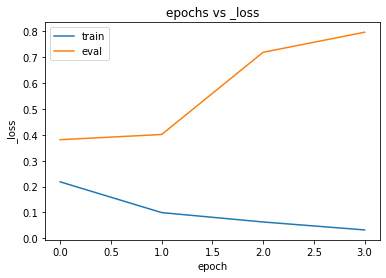

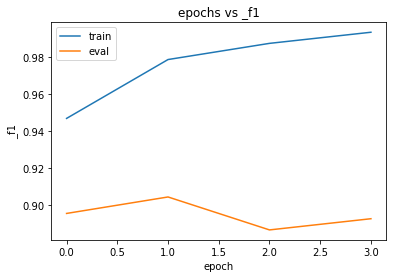

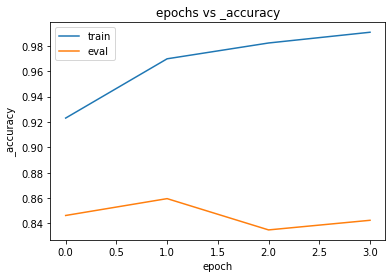

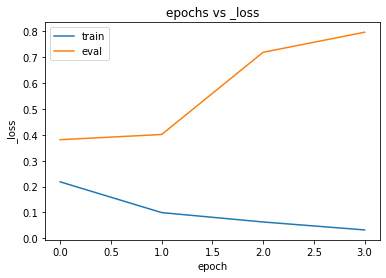

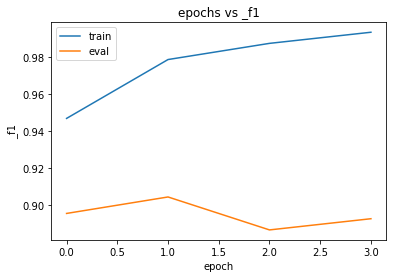

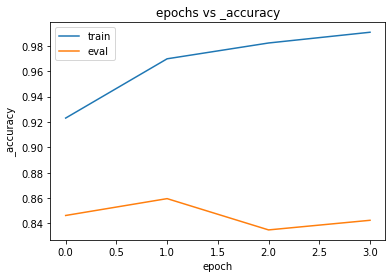

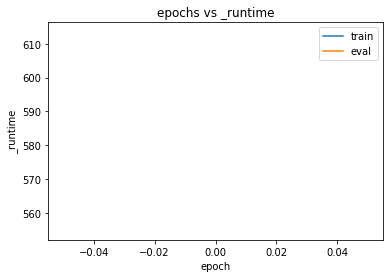

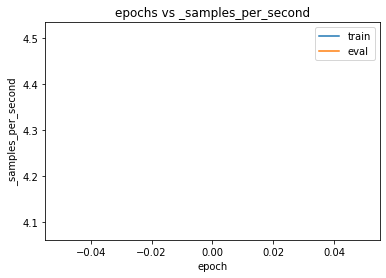

In [3]:
# import os, sys
# currentdir = os.path.dirname(os.path.realpath(__file__))
# preprocess_mod_ind = currentdir.split('/').index('CAMemBERT-Adapters')
# preprocess_mod_path = '/'.join(currentdir.split('/')[:preprocess_mod_ind+1])
# sys.path.append(preprocess_mod_path)
from transformers import AutoTokenizer,EarlyStoppingCallback,TrainingArguments,BertForSequenceClassification,AutoConfig
from datasets import load_dataset,load_metric
from src.utils.preprocessing import read_pickle_file
from src.models.trainers import BaseTrainer
from src.models.running import *
from sklearn.metrics import f1_score,accuracy_score
import torch
import numpy as np

def encode_batch(batch):
  """Encodes a batch of input data using the model tokenizer."""
  return tokenizer(batch[tokenize_col], max_length=max_n_tokens, truncation=True, padding="max_length")

def compute_metrics(p):
    logits, labels = np.argmax(p.predictions, axis=1),p.label_ids
    logits = logits.flatten()
    labels = labels.flatten()
    metrics_dic = {}
    metrics_dic['f1'] = f1_score(logits, labels)
    metrics_dic['accuracy'] = accuracy_score(logits,labels)
    return metrics_dic

es = 2
lr = 4e-5
bs = 16
epochs = 5
frozen_layers = 1
metric_for_best_model = 'f1'
dev = False

tokenize_col='sentences'
max_n_tokens=64
extra_cols_for_dataset=[]

params = generate_parameters(es,lr,bs,epochs,frozen_layers,metric_for_best_model,dev,max_n_tokens)

pre_trained_model_name = 'bert-base-uncased'
dataset_title = 'cola'
task = 'ged'
subtask = 'seq_class'
abrev_name = f'seq_class_bert_{dataset_title}'

file_paths = generate_file_paths(dataset_title,task,subtask,params,abrev_name)

dataset_dic = {'train':file_paths['train_file_path'].replace('_dev',''),'test':file_paths['test_file_path'].replace('_dev',''),'val':file_paths['val_file_path'].replace('_dev','')}

dataset = load_dataset('csv', data_files=dataset_dic)
tokenizer = AutoTokenizer.from_pretrained(pre_trained_model_name)
dataset = dataset.map(encode_batch, batched=True)
dataset.set_format(type="torch", columns=["input_ids", "attention_mask","labels"]+extra_cols_for_dataset)

n_labels = 2
model_config = AutoConfig.from_pretrained(pre_trained_model_name, num_labels=n_labels)
model = BertForSequenceClassification.from_pretrained(pre_trained_model_name, config=model_config)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

training_args = base_training_args(params,file_paths)

callbacks = [EarlyStoppingCallback(es)]

trainer = BaseTrainer(model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["val"],
    compute_metrics=compute_metrics,
    callbacks=callbacks,)

trainer.train()

print()
print('__________test set results__________')
trainer.evaluate(dataset['test'],testing=True)
hist = trainer.state.log_history[-1]
eval_data = generate_eval_data(hist,params,task,subtask,pre_trained_model_name)
update_evaluation_results_for_this_model(f'{file_paths["evaluation_file_this_model"]}',eval_data)
update_evaluation_results_for_subtask(file_paths)

print('_________plotting history__________')
trainer.plot_history(file_paths['plots_path'],f'{file_paths["full_model_name"]}')